## Overview
Dataset courtesy FiveThirtyEight (https://github.com/fivethirtyeight/data) via Dataquest (dataquest.io)

Question to answer: 
Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

In [123]:
import pandas as pd

star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

In [90]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The data has several columns, including:

RespondentID -- An anonymized ID of the person taking the survey.

Gender -- Gender of the respondent.

Age -- Age of the respondent.

Household Income -- Income of the respondent.

Education -- Education level of the respondent.

Location (Census Region) -- Location of the respondent.

Have you seen any of the 6 films in the Star Wars franchise? -- Yes or No response.

Do you consider yourself to be a fan of the Star Wars film franchise? -- Yes or No response.

There are several other columns, which involve questions about the Star Wars movies. Some questions involved checkboxes, where someone was asked which of several options they liked, and to check all the ones they did like. This type of data is hard to represent in columnar format, and you'll be cleaning up the columns extensively in this project.

This dataset needs a lot of cleaning, which makes it a good place to practice the skills you've been learning so far. The first step you'll take is to remove invalid rows. RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. You'll need to remove any rows with an invalid RespondentID.

## Instructions
Read the dataset into a Dataframe
Explore the data by using star_wars.head(10). Look for any strange values in the columns and rows.
Look at the column names with star_wars.columns.
Remove any rows where RespondentID is NaN. You can use the pandas.notnull() function for this. Only select rows where the RespondentID column is not null.
At the end star_wars should only consist of rows where RespondentID is not NaN.

Use star_wars = star_wars[pd.notnull(star_wars["RespondentID"])] to remove rows where RespondentID is NaN.

In [91]:
star_wars.head(10)
star_wars.columns
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])] 

## Cleaning up Yes/No columns

Take a look at the next two columns, which are:

* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Which of the following Star Wars films have you seen? Please select all that apply.`
You'll see that they are both Yes/No questions. There's another possible value they can take on, NaN, when a respondent chose not to answer that question. You can use the value_counts() method on a Series to see all the unique values in a column, and the counts of each value.

Both columns are currently string types -- Yes or No. In order to make it a bit easier to analyze down the line, convert each column to a Boolean, with only True, False, or NaN. Booleans are easier to work with because you can select the rows that are True or False without having to do a string comparisons.

You can use the map() method on Series to do this conversion.

If you have a Series that looks like this:

series = ["Yes", "No", NaN, "Yes"]
You can use a dictionary to define a mapping from each value in series to a new value:

yes_no = {
    "Yes": True,
    "No": False
}
Then, you can call the map function to perform the mapping:

series = series.map(yes_no)
series will end up looking like this:

[True, False, NaN, True]



## Instructions
Convert the Have you seen any of the 6 films in the Star Wars franchise? column to the Boolean type.
Convert the Which of the following Star Wars films have you seen? Please select all that apply. column to the Boolean type.
At the end, both columns should have only True, False, or NaN values in them.

In [92]:
yes_no = {'Yes': True, 'No': False}

for col in ['Have you seen any of the 6 films in the Star Wars franchise?', \
            'Do you consider yourself to be a fan of the Star Wars film franchise?']:
     star_wars[col] = star_wars[col].map(yes_no)


## Cleaning up checkbox columns
 
The next 6 columns represent a checkbox question. The respondent was asked Which of the following Star Wars films have you seen? Please select all that apply., and then was able to check off a series of boxes indicating which movies they saw.

The columns that represent this data are:

Which of the following Star Wars films have you seen? Please select all that apply. -- whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
Unnamed: 4 -- whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
Unnamed: 5 -- whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
Unnamed: 6 -- whether or not the respondent saw Star Wars: Episode IV A New Hope.
Unnamed: 7 -- whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
Unnamed: 8 -- whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.
For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw it. If the value is NaN, the respondent either didn't answer, or didn't see the movie, but we'll assume that they didn't see the movie.

You need to convert each of these columns to a Boolean, then rename the column to have a more clear name. You can do the Boolean conversion like you did earlier, except you'll need to include the the movie title and NaN in the mapping dictionary.

For example, if the column Series looks like this:

["Star Wars: Episode I  The Phantom Menace", NaN, "Star Wars: Episode I  The Phantom Menace"]
You can use a mapping dictionary that looks like this:

{
    "Star Wars: Episode I  The Phantom Menace": True,
    NaN: False
}
After you call the map() method on the Series, the column should only contain True or False values.

After the values are converted with the map method, you can rename the columns to better reflect what the values represent. You can use the rename() method on Dataframes for this.

The rename method works a lot like map. You pass it a dictionary that maps current column names to new ones:

star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1"
})
The rename method will only rename columns specified in the dictionary, and will not change the names of other columns. The above code will rename the Which of the following Star Wars films have you seen? Please select all that apply. column to seen_1.


Instructions

For each column above, convert the column to only contain True and False values.
One easy way to select the column names is to do star_wars.columns[3:9] instead of typing them out.
Be very careful with spacing when constructing your mapping dictionary! In the cells, Star Wars: Episode I The Phantom Menace has two spaces between the end of Episode I and the start of The Phantom, but this is not the case in Star Wars: Episode VI Return of the Jedi. Make sure to look at the values in the cells to find the appropriate spacing.
Rename each of the columns above to have more clear names. We recommend using seen_1 to indicate if the respondent saw Star Wars: Episode I The Phantom Menace, seen_2 for Star Wars: Episode II Attack of the Clones, and so on.
At the end, you should have clearly named columns indicating with a True or False if the respondent saw each Star Wars movie from 1-6.

In [93]:
import numpy as np
move_titles = {"Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(move_titles)


In [97]:
star_wars = star_wars.rename(columns={ star_wars.columns[3]: "seen_1",
                                     star_wars.columns[4]: "seen_2",
                                     star_wars.columns[5]: "seen_3",
                                     star_wars.columns[6]: "seen_4",
                                     star_wars.columns[7]: "seen_5",
                                     star_wars.columns[8]: "seen_6",
                                      })

## Cleaning up ranking columns

The next 6 columns ask the respondent to rank the Star Wars movies in order of least to most favorite. 1 means the film was their most favorite, and 6 means it was their least favorite. Each of the following columns can contain the values 1, 2, 3, 4, 5, 6, or NaN:

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. -- How much the respondent liked Star Wars: Episode I The Phantom Menace.
Unnamed: 10 -- How much the respondent liked Star Wars: Episode II Attack of the Clones.
Unnamed: 11 -- How much the respondent liked Star Wars: Episode III Revenge of the Sith.
Unnamed: 12 -- How much the respondent liked Star Wars: Episode IV A New Hope.
Unnamed: 13 -- How much the respondent liked Star Wars: Episode V The Empire Strikes Back.
Unnamed: 14 -- How much the respondent liked Star Wars: Episode VI Return of the Jedi.
You don't need to do a ton of cleanup for these columns. You'll need to convert each column to a numeric type, then rename the columns so you can tell what they're for more easily.

You can do the numeric conversion with the astype() method on Dataframes. In this case, you can use code that looks like this:

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
The code above will convert each column from column 9 up to but not including column 15 to a float type.


Instructions

Convert each column above to a float type.
Instead of typing in each column name, you can select them all with star_wars.columns[9:15].
Rename each of the above columns to a more descriptive name. We suggest ranking_1, ranking_2, and so on.
You can use the rename method from the last screen.


  

 


In [99]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [100]:
star_wars = star_wars.rename(columns={ star_wars.columns[9]: "ranking_1",
                                     star_wars.columns[10]: "ranking_2",
                                     star_wars.columns[11]: "ranking_3",
                                     star_wars.columns[12]: "ranking_4",
                                     star_wars.columns[13]: "ranking_5",
                                     star_wars.columns[14]: "ranking_6",
                                      })

## Finding the highest ranked movie
 
Now that you've cleaned up the ranking columns, you can easily find the highest ranked movie. You can do this by taking the mean of each of the ranking columns. The mean() method on Dataframes will enable you to do this.


Instructions

Use the mean method to compute the mean of each of the ranking columns from the last screen.
Make a bar chart of each ranking. You can use a matplotlib bar chart for this.
Make sure to run %matplotlib inline beforehand to show your plots in the notebook.
Create a markdown cell, and write a summary of what you've done up until now, and why you think the movies are ranked like they are.
Remember that a lower ranking is better!


<Container object of 6 artists>

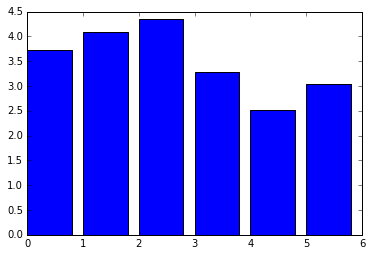

In [116]:
ranking_means = star_wars[star_wars.columns[9:15]].mean()
import matplotlib.pyplot as plt
%matplotlib inline 

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

Summary of what I've done so far:
In order to clean the Star Wars survey data, I had first get rid of the rows without response ID's, by filtering the Response ID column for not null values (.notnull()). Then I converted string responses to the first 8 questions into booleans using a mapping dictionary. I also converted the names of the ambiguous columns. Next, I converted the rankings column types from strings to floats, so I could later compute the movie ranking means. Along with converting the column values, I also renamed the ranking columns. Lastly, I made a bar chart that shows the ranking averages of the individual means.

<Container object of 6 artists>

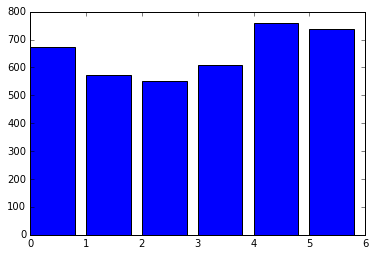

In [117]:
seen_sums = star_wars[star_wars.columns[3:9]].sum()

plt.bar(range(6), seen_sums )

It seems like Episode IV is ranked highest because the most people have seen it. 

Exploring the data by binary segments

We've seen what the whole survey population thinks are the highest ranked movies, but we can break this down by segments. There are several columns that segment our data into two groups, including:

Do you consider yourself to be a fan of the Star Wars film franchise? -- True or False.
Do you consider yourself to be a fan of the Star Trek franchise? -- Yes or No.
Gender -- Male or Female.
You can split a Dataframe into two groups based on a binary column by taking two subsets. Here, we'll split on the Gender column:

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
We can compute statistics like the most seen movie and the highest ranked movie separately for each group.


Instructions

Split the data into 2 groups based on one of the above columns.
Redo the 2 previous analyses (find the most seen movie and finding the highest ranked movie) separately for each group, and then compare results.
Write about any interesting patterns you see in a Markdown cell.

  

 


In [118]:
trek_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
NOT_trek_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']

In [119]:
seen_treks = trek_fans[trek_fans.columns[3:9]].sum()
seen_NOTtreks = NOT_trek_fans[NOT_trek_fans.columns[3:9]].sum()
print(seen_treks, seen_NOTtreks)

seen_1    364
seen_2    336
seen_3    322
seen_4    342
seen_5    397
seen_6    396
dtype: int64 seen_1    301
seen_2    228
seen_3    221
seen_4    258
seen_5    353
seen_6    334
dtype: int64


In [120]:
rank_means_treks = trek_fans[trek_fans.columns[9:15]].mean()
rank_means_NOTtreks = NOT_trek_fans[NOT_trek_fans.columns[9:15]].mean()
print(rank_means_treks, rank_means_NOTtreks)

ranking_1    3.968675
ranking_2    4.255422
ranking_3    4.403382
ranking_4    3.110843
ranking_5    2.407229
ranking_6    2.850602
dtype: float64 ranking_1    3.487864
ranking_2    3.915254
ranking_3    4.278450
ranking_4    3.433414
ranking_5    2.634383
ranking_6    3.244552
dtype: float64


It looks like more Star Trek fans have seen the Star Wars movies than non Star Trek fans, but when it comes to ranking them, the rankings are comparable.